In [ ]:
#IMPORT  KAGGLE DATA SOURCES
import kagglehub
mdwaquarazam_agricultural_crops_image_classification_path = kagglehub.dataset_download('mdwaquarazam/agricultural-crops-image-classification')

print('Data source import complete.')


100%|██████████| 79.0M/79.0M [00:01<00:00, 72.2MB/s]

Extracting files...


Data source import complete.


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mdwaquarazam/agricultural-crops-image-classification")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/agricultural-crops-image-classification


In [ ]:
import os

os.listdir(path)

['Agricultural-crops']

In [ ]:
ROOT_PATH = os.path.join(path, 'Agricultural-crops')
ROOT_PATH

'/kaggle/input/agricultural-crops-image-classification/Agricultural-crops'

In [ ]:

folders = os.listdir(ROOT_PATH)
folders

['tomato',
 'chilli',
 'clove',
 'pineapple',
 'vigna-radiati(Mung)',
 'Olive-tree',
 'coconut',
 'papaya',
 'Tobacco-plant',
 'jute',
 'jowar',
 'gram',
 'tea',
 'maize',
 'wheat',
 'soyabean',
 'Pearl_millet(bajra)',
 'Lemon',
 'Fox_nut(Makhana)',
 'mustard-oil',
 'sugarcane',
 'almond',
 'Cucumber',
 'sunflower',
 'cotton',
 'banana',
 'Cherry',
 'cardamom',
 'rice',
 'Coffee-plant']

In [ ]:
num_folders = len(folders)
num_folders

30

<Figure size 1500x10200 with 0 Axes>

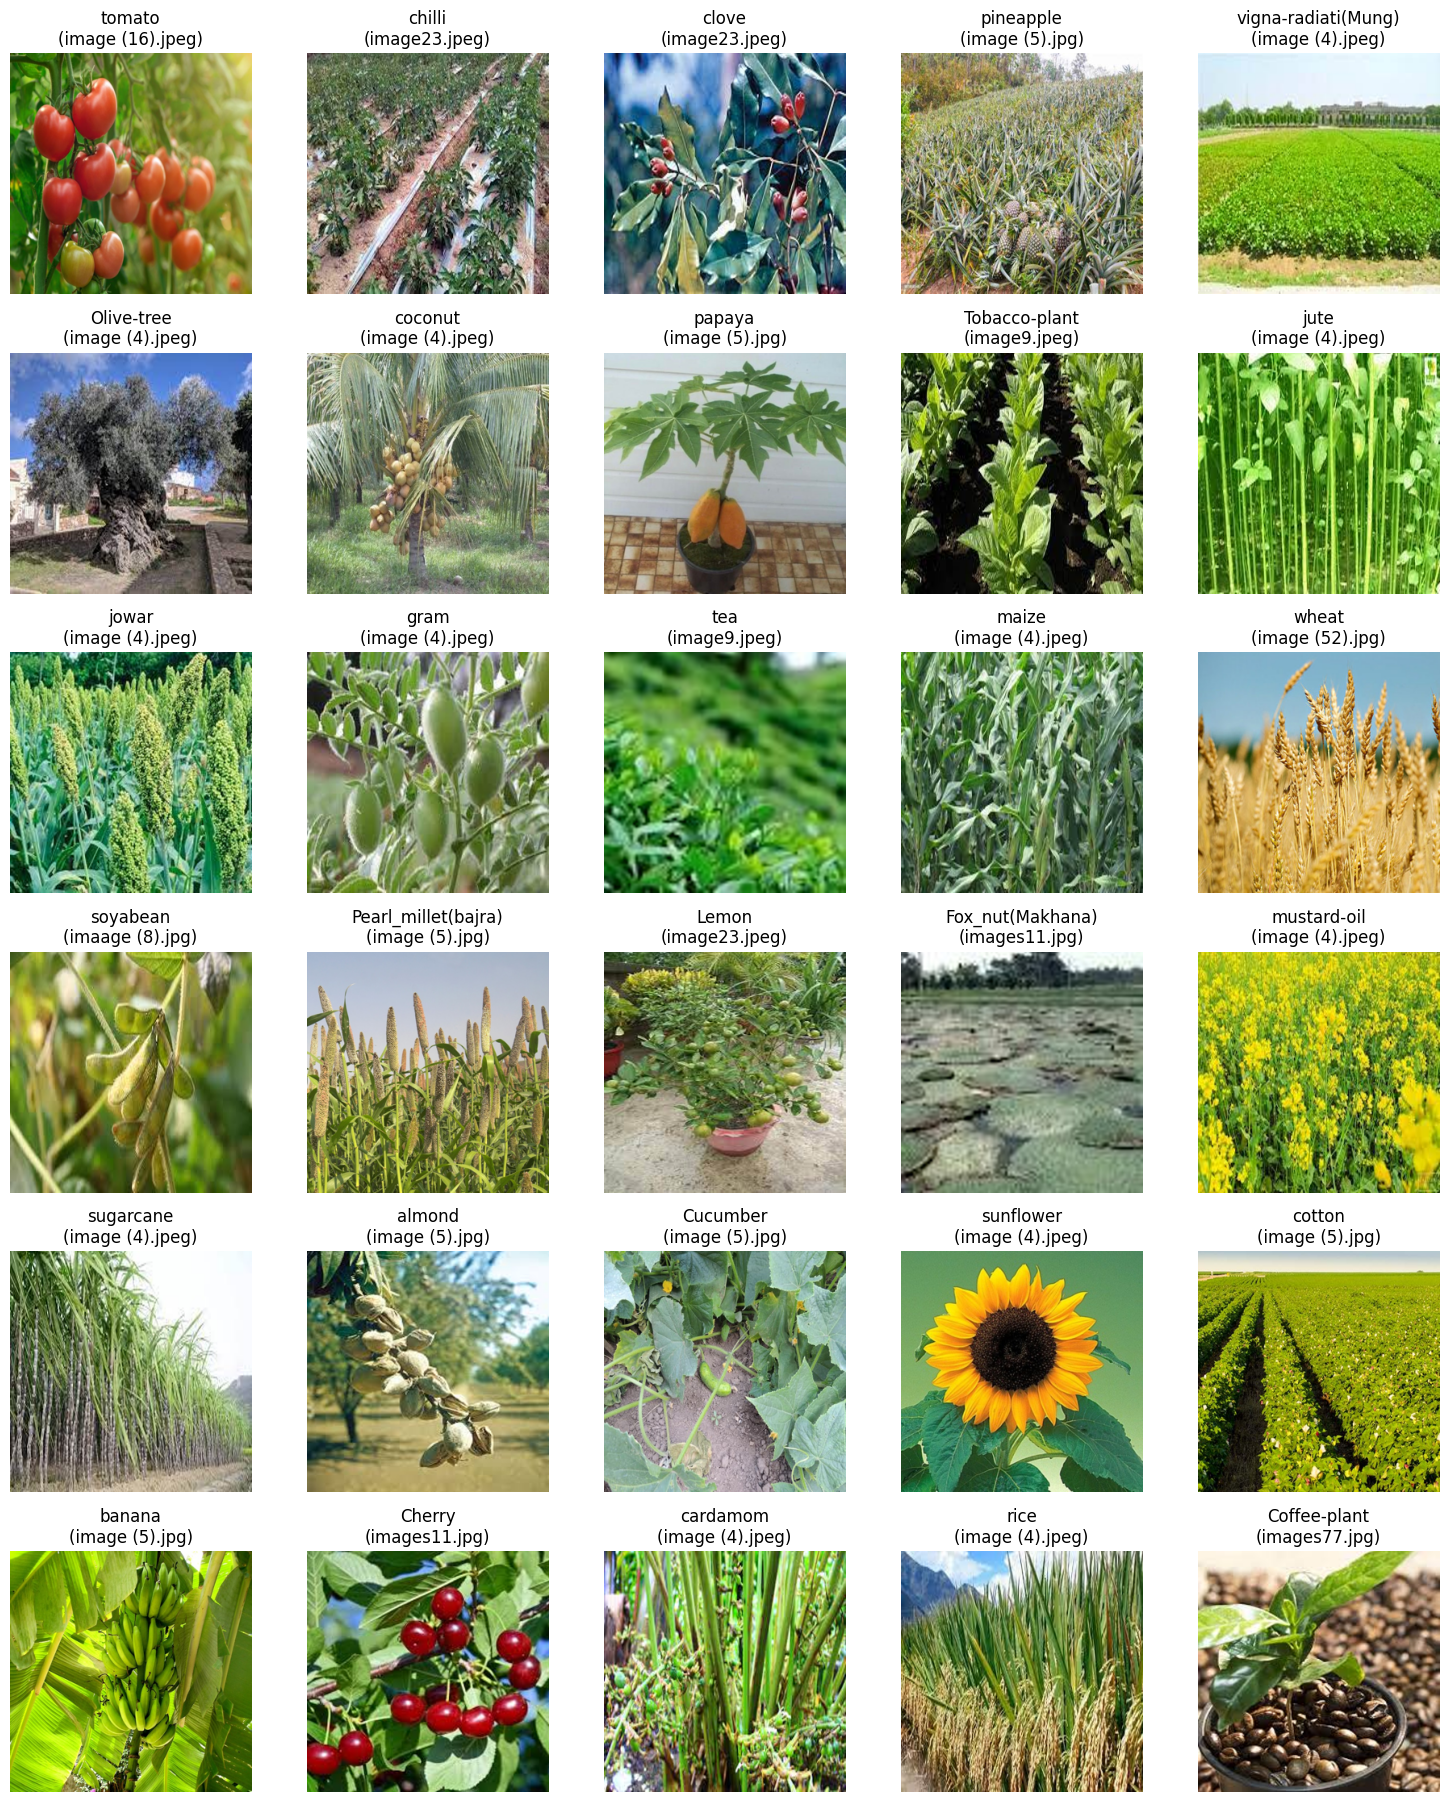

In [ ]:
from PIL import Image

num_cols = 5

num_rows = (num_folders + num_cols - 1)

plt.figure(figsize=(num_cols*3, num_rows*3))

plt.figure(figsize=(num_cols * 3, num_rows * 3))

image_count = 0
for folder_name in folders:
    folder_path = os.path.join(ROOT_PATH, folder_name)
    files_in_folder = os.listdir(folder_path)
    if files_in_folder:
        first_image_path = os.path.join(folder_path, files_in_folder[0])
        img = Image.open(first_image_path).resize((300, 300))
        image_count += 1
        plt.subplot(num_rows, num_cols, image_count)
        plt.imshow(img)
        plt.title(f'{folder_name}\n({os.path.basename(first_image_path)})', fontsize=12)
        plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# parameters
IMG_SIZE = (160, 160)
BATCH_SIZE = 32
SEED = 32

In [ ]:
# create data generators for training
training_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [ ]:
# load training data
train_generator = training_datagen.flow_from_directory(
    ROOT_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    seed=SEED
)

Found 674 images belonging to 30 classes.


In [ ]:
#Load validation data
val_generator = training_datagen.flow_from_directory(
    ROOT_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    seed=SEED
)

Found 155 images belonging to 30 classes.


In [ ]:

# get class names and number of classes
class_names = list(train_generator.class_indices.keys())
num_classes = len(class_names)

print(f"Number of classes: {num_classes}")
print(f"Class names: {class_names}")

Number of classes: 30
Class names: ['Cherry', 'Coffee-plant', 'Cucumber', 'Fox_nut(Makhana)', 'Lemon', 'Olive-tree', 'Pearl_millet(bajra)', 'Tobacco-plant', 'almond', 'banana', 'cardamom', 'chilli', 'clove', 'coconut', 'cotton', 'gram', 'jowar', 'jute', 'maize', 'mustard-oil', 'papaya', 'pineapple', 'rice', 'soyabean', 'sugarcane', 'sunflower', 'tea', 'tomato', 'vigna-radiati(Mung)', 'wheat']


In [ ]:
# create a model with MobileNetV2
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(160,160,3),
    include_top=False,
    weights='imagenet'
)

# freeze the base model
base_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# create the model
model = keras.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_classes, activation='softmax')
])

In [ ]:
# compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.0814 - loss: 3.7628 - val_accuracy: 0.2645 - val_loss: 2.8419
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.2503 - loss: 2.8311 - val_accuracy: 0.3290 - val_loss: 2.4608
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.3659 - loss: 2.2768 - val_accuracy: 0.4323 - val_loss: 2.1652
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.4602 - loss: 1.9823 - val_accuracy: 0.4903 - val_loss: 1.9977
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.5302 - loss: 1.6590 - val_accuracy: 0.5097 - val_loss: 1.7285
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.5347 - loss: 1.4827 - val_accuracy: 0.5355 - val_loss: 1.6796
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.5802 - loss: 1.3640 - val_accuracy: 0.5613 - val_loss: 1.6699
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.6357 - loss: 1.2351 - val_accuracy: 0.5935 - val_loss:

In [ ]:
history.history

{'accuracy': [0.09050445258617401,
  0.2640949487686157,
  0.3783382773399353,
  0.47032642364501953,
  0.5252225399017334,
  0.5296735763549805,
  0.5875371098518372,
  0.6231454014778137,
  0.6572700142860413,
  0.6602373719215393],
 'loss': [3.50500226020813,
  2.745244264602661,
  2.189962387084961,
  1.9187017679214478,
  1.6890558004379272,
  1.5356262922286987,
  1.3569461107254028,
  1.2870218753814697,
  1.1532515287399292,
  1.128479242324829],
 'val_accuracy': [0.26451611518859863,
  0.3290322721004486,
  0.43225806951522827,
  0.4903225898742676,
  0.5096774101257324,
  0.5354838967323303,
  0.5612903237342834,
  0.5935483574867249,
  0.57419353723526,
  0.5290322303771973],
 'val_loss': [2.841906785964966,
  2.4607932567596436,
  2.165189266204834,
  1.99767005443573,
  1.7284687757492065,
  1.6796213388442993,
  1.6699402332305908,
  1.563589334487915,
  1.5342121124267578,
  1.5190880298614502]}

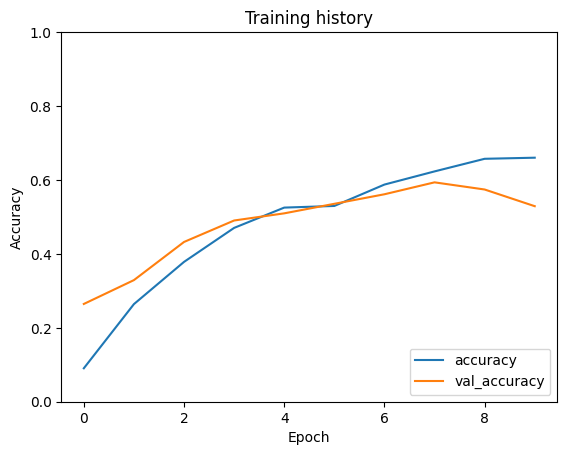

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training history')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
# convert the model to TensorFlow Light
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

Saved artifact at '/tmp/tmp23hw6uag'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 160, 160, 3), dtype=tf.float32, name='keras_tensor_154')
Output Type:
  TensorSpec(shape=(None, 30), dtype=tf.float32, name=None)
Captures:
  138468608297296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138468603367440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138468603371664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138468608310352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138468603367632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138468608309200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138468603370704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138468603368592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138468603363792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138468603365520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138468603

In [ ]:
# save the model
tflite_model_path = 'crop_classifier.tflite'
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)
print('Model saved!')

Model saved!


In [ ]:
# load the model and allocate tensors
intepreter = tf.lite.Interpreter(model_path=tflite_model_path)
intepreter.allocate_tensors()

In [ ]:
input_details = intepreter.get_input_details()
output_details = intepreter.get_output_details()

In [ ]:
# function to preprocess image for TFLite model
def preprocess_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=IMG_SIZE)
    image_array = tf.keras.preprocessing.image.img_to_array(img)
    image_array = image_array/255.0
    image_array = np.expand_dims(image_array, axis=0)
    return image_array

In [ ]:
# test on sampleimage
sample_image_path = os.path.join(ROOT_PATH, folders[0], os.listdir(os.path.join(ROOT_PATH, folders[0]))[0])
input_data = preprocess_image(sample_image_path)
input_data

array([[[[0.25490198, 0.2627451 , 0.07843138],
         [0.15294118, 0.32156864, 0.        ],
         [0.14509805, 0.29803923, 0.07450981],
         ...,
         [0.9372549 , 0.8       , 0.4       ],
         [0.94509804, 0.7921569 , 0.43529412],
         [0.9529412 , 0.7921569 , 0.47058824]],

        [[0.32156864, 0.35686275, 0.10196079],
         [0.24705882, 0.4       , 0.05098039],
         [0.12941177, 0.27058825, 0.        ],
         ...,
         [0.92941177, 0.80784315, 0.39215687],
         [0.9372549 , 0.8039216 , 0.42352942],
         [0.9490196 , 0.8       , 0.46666667]],

        [[0.42745098, 0.5019608 , 0.28627452],
         [0.3764706 , 0.49411765, 0.2509804 ],
         [0.37254903, 0.49411765, 0.25882354],
         ...,
         [0.91764706, 0.81960785, 0.41568628],
         [0.92941177, 0.8156863 , 0.41568628],
         [0.94509804, 0.8117647 , 0.45882353]],

        ...,

        [[0.44705883, 0.4392157 , 0.23921569],
         [0.42745098, 0.4117647 , 0.22352941]

In [ ]:
#now we rin the interface on the test image, the image is a tomato image, we expect the model to predict a tomato
intepreter.set_tensor(input_details[0]["index"], input_data)
intepreter.invoke()

In [ ]:
#Get Predictions
predictions = intepreter.get_tensor(output_details[0]['index'])
print("Predictions: ", predictions)

predicted_class = np.argmax(predictions[0])
print("Predicted Class: ", predicted_class)

Predictions:  [[1.04217805e-01 3.53842638e-02 2.06761571e-04 1.96203496e-03
  2.40375642e-02 1.71037223e-02 3.70071735e-04 9.29988571e-04
  1.14732124e-02 6.79880439e-04 1.09978160e-02 7.07227096e-04
  1.39644824e-03 2.70563900e-03 7.46520748e-03 2.54267454e-02
  4.50198818e-03 5.84065274e-04 2.17164648e-04 3.62111634e-04
  3.63207832e-02 5.28460776e-04 4.49789630e-04 9.85474442e-04
  4.16079216e-04 9.49900423e-04 1.76701855e-04 7.08170712e-01
  3.45441367e-04 9.26991284e-04]]
Predicted Class:  27


In [ ]:
print('Predicted class: ', class_names[predicted_class])
print('Actual class: ', folders[0])
print(f'Confidence: , {predictions[0][predicted_class]:.2f}')

Predicted class:  tomato
Actual class:  tomato
Confidence: , 0.71


In [ ]:
# The model was able to make the correct predicting on the input image with a 71% confidence level
# We can increase the the score by fine tuning he model

In [ ]:
# we can unfreeze some layers for fine-tuning